In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd

In [2]:
# 국립공원 기본통계 (출처: KOSIS 국가통계포털)
df = pd.read_csv('NLPRK_STA.csv', encoding='cp949')
df.head()

,공원명,육지면적,탐방객수
0,지리산,483.022,3308833
1,경주,136.550,2887634
2,계룡산,65.335,1817602
3,한려해상,127.188,6439653
4,설악산,398.237,3241484


In [31]:
sns.set(style='whitegrid', font_scale=1.2) # Seaborn 설정

In [32]:
# 국립공원 육지면적, 탐방객수
X = df.iloc[:, [1, 2]].values # shape=(22, 2)
m=X.shape[0] # 집합 개수 (m=22)
n=X.shape[1] # 특징 개수 (n=2)

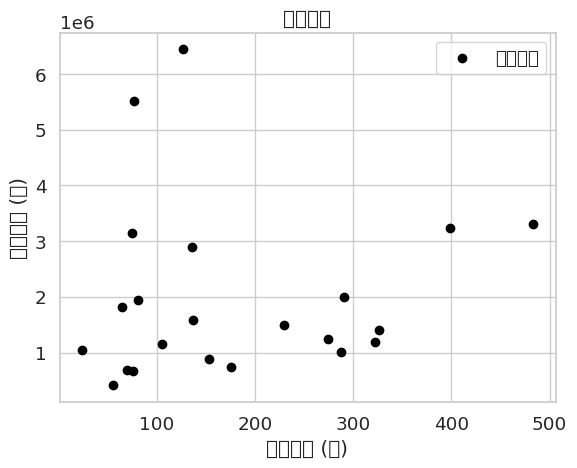

In [33]:
plt.scatter(X[:,0],X[:,1],c='black',label='국립공원')
plt.xlabel('육지면적 (㎢)')
plt.ylabel('탐방객수 (명)')
plt.legend()
plt.title('국립공원')
plt.show()

In [34]:
K=3 # 클러스터 개수
n_iter=100 # 반복 횟수

In [35]:
Centroids=np.array([]).reshape(n,0) # 클러스터 중심 초기화
Centroids # shape=(2, 0)

array([], shape=(2, 0), dtype=float64)

In [36]:
for i in range(3):
    print(i) # 0 1 2

0
1
2


In [37]:
# 두 수 사이의 난수(정수) 생성 예시
rd.randint(0,2) # 0과 2 사이 난수(정수) 생성: 0, 1, 2

2

In [38]:
for i in range(K): # 0, 1, 2
    rand=rd.randint(0,m-1) # 0과 21 사이 난수 생성
    Centroids=np.c_[Centroids,X[rand]] # 클러스터 중심(열) 추가
Centroids # K개 클러스터 중심 초기값. shape=(2, 3)

array([[4.830220e+02, 3.982370e+02, 7.542500e+01],
       [3.308833e+06, 3.241484e+06, 3.143779e+06]])

In [39]:
Output={} # 출력값 초기화(딕셔너리)

In [40]:
# 유클리드 거리 초기화
EuclidianDistance=np.array([]).reshape(m,0)
EuclidianDistance # shape=(22, 0)

array([], shape=(22, 0), dtype=float64)

In [41]:
Centroids[:,0] # shape=(2,)

array([4.830220e+02, 3.308833e+06])

In [42]:
# 넘파이 브로드캐스트(broadcast): 형상이 다른 배열끼리도 계산 가능
# (22, 2) 행렬 A에서 (2,) 벡터 값을 차감하면, 벡터 값은 (22, 2) 행렬로 확대된 후 연산
tempDist = np.sum((X-Centroids[:,0])**2,axis=1)
tempDist # shape=(22,)

array([0.00000000e+00, 1.77408718e+11, 2.22377007e+12, 9.80203400e+12,
       4.53589499e+09, 4.26000936e+12, 5.84196645e+12, 1.85019045e+12,
       6.94813767e+12, 3.26715392e+12, 3.64700759e+12, 4.63872536e+12,
       5.10244419e+12, 1.74522862e+12, 4.88266377e+12, 6.60729041e+12,
       5.26261956e+12, 4.47257786e+12, 2.99201443e+12, 8.40943759e+12,
       2.72429891e+10, 6.91040560e+12])

In [43]:
np.c_[EuclidianDistance,tempDist] # (22, 0) 행렬에 (22,) 옆으로 붙이기

array([[0.00000000e+00],
       [1.77408718e+11],
       [2.22377007e+12],
       [9.80203400e+12],
       [4.53589499e+09],
       [4.26000936e+12],
       [5.84196645e+12],
       [1.85019045e+12],
       [6.94813767e+12],
       [3.26715392e+12],
       [3.64700759e+12],
       [4.63872536e+12],
       [5.10244419e+12],
       [1.74522862e+12],
       [4.88266377e+12],
       [6.60729041e+12],
       [5.26261956e+12],
       [4.47257786e+12],
       [2.99201443e+12],
       [8.40943759e+12],
       [2.72429891e+10],
       [6.91040560e+12]])

In [44]:
for k in range(K): # 0, 1, 2
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
EuclidianDistance # shape=(22, 3)

array([[0.00000000e+00, 4.53589499e+09, 2.72429891e+10],
       [1.77408718e+11, 1.25209891e+11, 6.56102648e+10],
       [2.22377007e+12, 2.02744006e+12, 1.75874544e+12],
       [9.80203400e+12, 1.02282850e+13, 1.08627854e+13],
       [4.53589499e+09, 0.00000000e+00, 9.54637123e+09],
       [4.26000936e+12, 3.98653137e+12, 3.60591620e+12],
       [5.84196645e+12, 5.52093507e+12, 5.07133286e+12],
       [1.85019045e+12, 1.67150777e+12, 1.42841460e+12],
       [6.94813767e+12, 6.59761873e+12, 6.10523809e+12],
       [3.26715392e+12, 3.02821950e+12, 2.69771758e+12],
       [3.64700759e+12, 3.39430880e+12, 3.04383858e+12],
       [4.63872536e+12, 4.35315267e+12, 3.95499133e+12],
       [5.10244419e+12, 4.80271622e+12, 4.38401938e+12],
       [1.74522862e+12, 1.57181886e+12, 1.33637535e+12],
       [4.88266377e+12, 5.18483840e+12, 5.63933782e+12],
       [6.60729041e+12, 6.26558976e+12, 5.78600209e+12],
       [5.26261956e+12, 4.95815282e+12, 4.53258143e+12],
       [4.47257786e+12, 4.19224

In [45]:
# 유클리드 거리가 최소가 되는 색인
np.argmin(EuclidianDistance,axis=1)

array([0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2])

In [46]:
# K 클러스터 저장
C=np.argmin(EuclidianDistance,axis=1)+1
C # shape=(22,)

array([1, 3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3])

In [47]:
Y={} # 출력값 임시 딕셔너리

In [48]:
for k in range(K): # 0, 1, 2
    Y[k+1]=np.array([]).reshape(2,0) # 특징 개수
Y

{1: array([], shape=(2, 0), dtype=float64),
 2: array([], shape=(2, 0), dtype=float64),
 3: array([], shape=(2, 0), dtype=float64)}

In [49]:
# 출력값 임시 딕셔너리 갱신
Y[C[0]]=np.c_[Y[C[0]],X[0]] # C[0] 키 값에 대한 재귀적 갱신
Y[C[0]]

array([[4.830220e+02],
       [3.308833e+06]])

In [50]:
# 출력값 임시 딕셔너리: 키 값에 대한 재귀적 갱신
for i in range(m): # m=22
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
Y

{1: array([[4.830220e+02, 4.830220e+02, 1.271880e+02, 7.692200e+01],
        [3.308833e+06, 3.308833e+06, 6.439653e+06, 5.518508e+06]]),
 2: array([[3.982370e+02],
        [3.241484e+06]]),
 3: array([[1.365500e+02, 6.533500e+01, 2.747660e+02, 1.533320e+02,
         8.070800e+01, 7.625600e+01, 2.294300e+02, 3.263480e+02,
         1.055950e+02, 2.422300e+01, 2.910230e+02, 1.756680e+02,
         2.875710e+02, 3.220110e+02, 1.367070e+02, 5.622000e+01,
         7.542500e+01, 7.005200e+01],
        [2.887634e+06, 1.817602e+06, 1.244854e+06, 8.918170e+05,
         1.948616e+06, 6.729010e+05, 1.501306e+06, 1.399119e+06,
         1.155063e+06, 1.049974e+06, 1.987762e+06, 7.383680e+05,
         1.014793e+06, 1.193986e+06, 1.579089e+06, 4.089300e+05,
         3.143779e+06, 6.800680e+05]])}

In [51]:
Y[1] # shape=(10, 2)

array([[4.830220e+02, 4.830220e+02, 1.271880e+02, 7.692200e+01],
       [3.308833e+06, 3.308833e+06, 6.439653e+06, 5.518508e+06]])

In [52]:
Y[1].T # 전치행렬: shape=(2, 10)

array([[4.830220e+02, 3.308833e+06],
       [4.830220e+02, 3.308833e+06],
       [1.271880e+02, 6.439653e+06],
       [7.692200e+01, 5.518508e+06]])

In [53]:
# 출력값 임시 디렉터리: 전치행렬
for k in range(K): # 0, 1, 2
    Y[k+1]=Y[k+1].T
Y

{1: array([[4.830220e+02, 3.308833e+06],
        [4.830220e+02, 3.308833e+06],
        [1.271880e+02, 6.439653e+06],
        [7.692200e+01, 5.518508e+06]]),
 2: array([[3.982370e+02, 3.241484e+06]]),
 3: array([[1.365500e+02, 2.887634e+06],
        [6.533500e+01, 1.817602e+06],
        [2.747660e+02, 1.244854e+06],
        [1.533320e+02, 8.918170e+05],
        [8.070800e+01, 1.948616e+06],
        [7.625600e+01, 6.729010e+05],
        [2.294300e+02, 1.501306e+06],
        [3.263480e+02, 1.399119e+06],
        [1.055950e+02, 1.155063e+06],
        [2.422300e+01, 1.049974e+06],
        [2.910230e+02, 1.987762e+06],
        [1.756680e+02, 7.383680e+05],
        [2.875710e+02, 1.014793e+06],
        [3.220110e+02, 1.193986e+06],
        [1.367070e+02, 1.579089e+06],
        [5.622000e+01, 4.089300e+05],
        [7.542500e+01, 3.143779e+06],
        [7.005200e+01, 6.800680e+05]])}

In [54]:
for k in range(K): # 0, 1, 2
     Centroids[:,k]=np.mean(Y[k+1],axis=0)
Centroids

array([[2.92538500e+02, 3.98237000e+02, 1.60401111e+02],
       [4.64395675e+06, 3.24148400e+06, 1.40642561e+06]])

In [55]:
for i in range(n_iter): # n_iter 반복 횟수
    # 유클리드 거리가 최소가 되는 K 클러스터 할당
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1) # shape=(22,)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist] # shape=(22, 3)
    C=np.argmin(EuclidianDistance,axis=1)+1 # shape=(22,)
    # K 클러스터 갱신
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0) # Y 딕셔너리 키, 값 할당
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]] # Y 딕셔너리 키(K클러스터), 값(육지면적, 탐방객수) 할당
    for k in range(K):
        Y[k+1]=Y[k+1].T # 전치행렬
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0) # K 클러스터 중심 갱신
    Output=Y

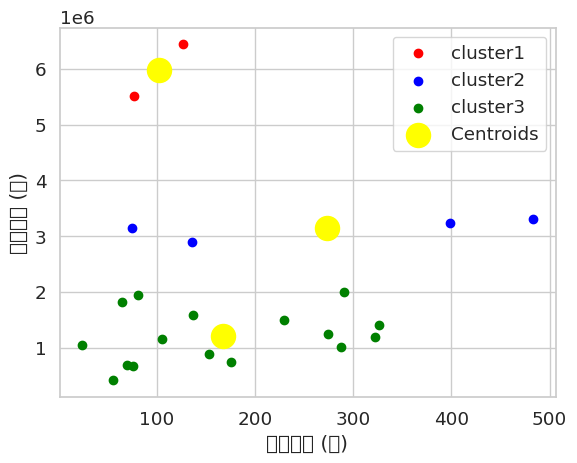

In [56]:
# K-평균 클러스터링 결과 가시화
color=['red','blue','green']
labels=['cluster1','cluster2','cluster3']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('육지면적 (㎢)')
plt.ylabel('탐방객수 (명)')
plt.legend()
plt.show()
